In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
#For linear Regression using the statsmodels package
import statsmodels.api as stm
#For linear Regression using the sklearn package
import scipy.stats as stats
import sklearn

D:\akhila\python\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir("C:\\Users\\sri\\Downloads")

In [3]:
#Reading the data
House = pd.read_csv("kc_house_data.csv")

In [4]:
House2 = House.copy()

## 1. Objective : 

           To predict house pricing based on the attributes provided using Linear Regression.

## 2. Planning :

           a. EDA
           b. Finding Analomalies and correct if present.
           c. Check for Missing values and impute if present.
           d. Identify important variables for regression.
           e. Feature engineering.
           f. Model fitting.
           g. Validation of model.
           h. Conclusion.

## 3. EDA :  

To start with EDA, let us first identify Categorical and Numerical variables from the dataset.

In [5]:
num_var = House2.select_dtypes(include=[np.number])  # Used to get numerical variables from the dataset
num_var.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
cat_var = House2.select_dtypes(include=[np.object]) # Used to get categorical variables from the dataset.
cat_var.head()

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000


For further analysis, let us consider numerical variables and identify discrete variables among them.

From the numerical data, we can see that the following values are discrete in nature:

'bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade'.

Now that we have identified discrete variables, let us plot box plot for these variables against Price.

In [7]:
#Function to plot boxplots for discrete variables.

#Input: discrete
#output : boxplots

def plotBox(discrete):
    
    for variable in discrete:
        House2.boxplot(column='price', by=variable, notch=True, figsize=(8,6))
        #plt.savefig(fname = variable,format = 'png' )  # .savefig to save the figure.
        plt.show()  # to plot the figure

D:\akhila\python\anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


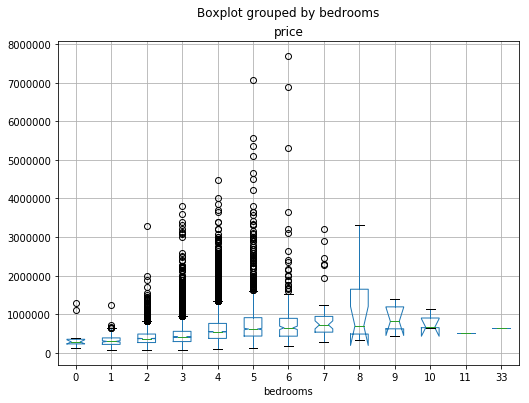

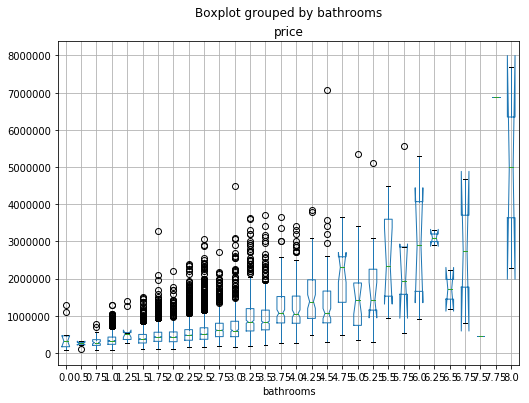

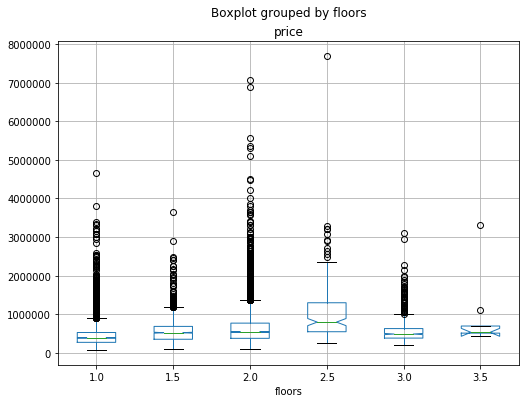

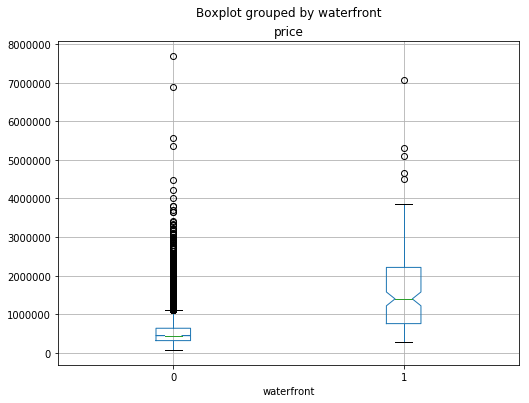

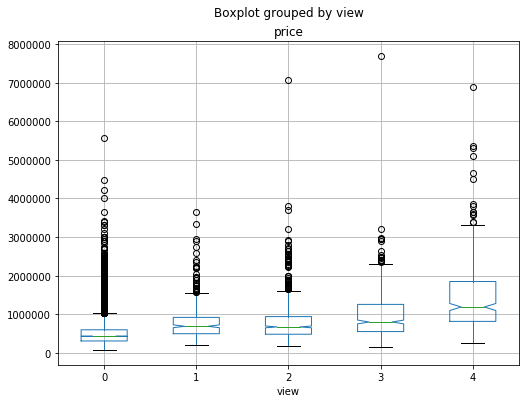

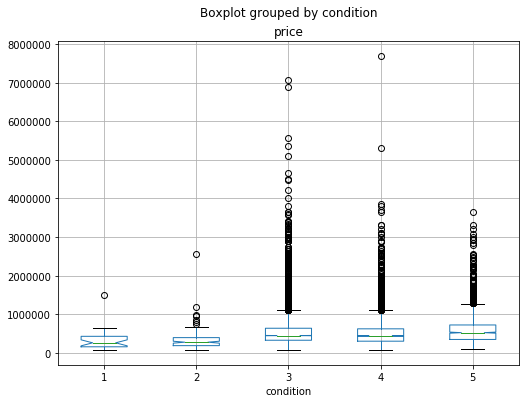

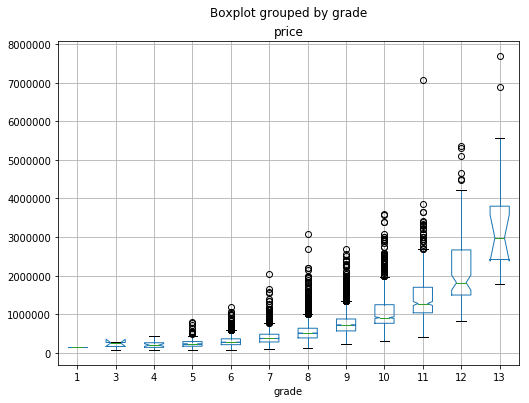

In [8]:
discrete = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade']
plotBox(discrete)

In [9]:
#Function to plot scatter plots for continuous numerical variables.

#Input: conti
#output : scatterplots

def plotScatter(conti):
    
    #discrete = ['sqft_above','sqft_basement']
    for cat in conti:
        plt.scatter(x= House2.price,y=House2[cat],color="black")
        plt.ylabel('Price', fontsize=12)
        plt.xlabel(cat, fontsize=12)
        plt.title('Scatter plot of Price vs '+cat,fontsize=14)
         #plt.savefig(fname = cat,format = 'png' )  # .savefig to save the figure.
        plt.show()  # to plot the figure
    

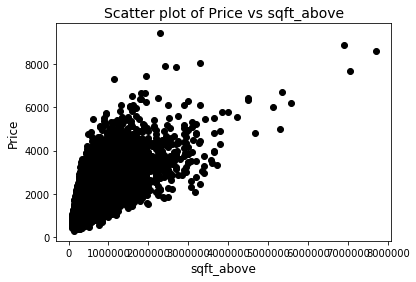

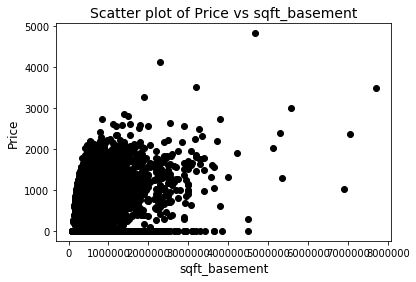

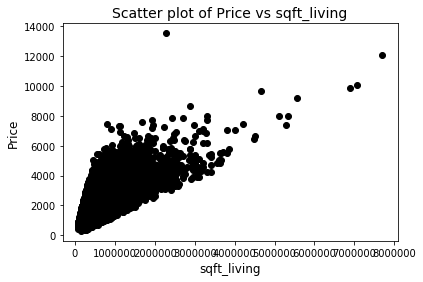

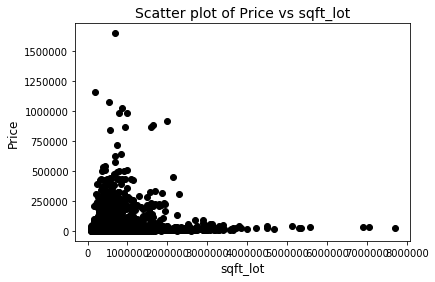

In [10]:
conti = ['sqft_above','sqft_basement','sqft_living','sqft_lot']
plotScatter(conti)

In [11]:
(House2[House2.bathrooms <= 5].bathrooms.count()/House2.bathrooms.count())*100

99.801045666959695

In [12]:
(House2[House2.bedrooms <= 5].bedrooms.count()/House2.bedrooms.count())*100

98.454633785221858

In [13]:
(House2[House2.floors <= 2].floors.count()/House2.floors.count())*100

96.381807245639195

### Observations from the plots:

#### Box Plots:

1.  The price of houses are increasing with the increase in bathrooms and the houses with bathrooms <= 5 account for 99% of the overall data and can be considered an important attribute. (refer: Boxplot Price grouped by bathrooms)
2. The price of houses are increasing with the increase in bedrooms and the houses with bedrooms <= 5 account for 98% of overall data and can be considered an important attribute. (refer: Boxplot Price grouped by bedrooms)
3. Floors <= 2 are 92% of overall data with high demand for houses with 1 foor or 2 floors. The houses which have median floors of 2.5 have slightly higher price.  (refer: Boxplot Price grouped by floors)
4. Prices of the houses increases with increase in grade. Better grade means higher is the price of the house.  (refer: Boxplot Price grouped by grade)
5. Maximum number of houses are present in the condition 3,4,5. It can be observed that better is the condition of the house, higher is the price. There are very few people who buy houses which have conditions as 1-2 and prices of these houses are lower as compared to houses with other conditions. (refer: Boxplot Price grouped by conditions)
6. Houses with waterfront are less as  compared to houses without waterfront. The medain price of houses with waterfront is more than houses without waterfront. Given that, there are many houses which do not have waterfront but still sold at higher prices as seen from the outliers in the boxplot. So, waterfront alone does not huge impact on price. (refer: Boxplot Price grouped by waterfront)
7. From the box plot for view we can see that as the view level increases, the price of the house tends to increase. (refer: Boxplot Price grouped by view)

#### Scatter Plots:

1. From all the scatter plots, we can observe that there is some correlation between 'sqft_above','sqft_basement','sqft_living','sqft_lot' and price.
2. Though the correlation is seen, we can observe that the relation is NOT linear.

#### Other observations:

1. An important observation is : sqft_living = sqft_above + sqft_basement

## 4. Correction of Anomalies :

### Checking for Anamolies

In [14]:
House2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



#### Observation :
    
    1. From above we can see that there are some houses which have bathrooms as 0. This is an anamoly.
    2. We can also see that min value for bedroom is 0. Let us check if this is the case for houses which have more than 1 floor.
    

In [15]:
# Checking if bedroom is zero for floor > 0

House2[(House2.floors > 1) & (House2.bedrooms == 0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1100000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.5,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
6994,2954400190,20140624T000000,1300000.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.5,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.5,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.5,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


#### Observation: 
    
    1. From above we can see that there are 9 houses where there are no bedrooms even if floors are greater than 1.
    So clearly, this is an anomaly as well.

##### Summary of anamolies:

1. From above we can see that there are some houses which have bathrooms as 0. This is an anamoly.
2. From above we can see that there are 9 houses where there are no bedrooms even if floors are greater than 1.
   So clearly, this is an anomaly as well.
   
Now that we have found the anamolies, let us remove those values.

### Handling Anamolies

In [16]:
House2  = House2.loc[(House2.bathrooms !=0) & (House2.floors > 1), ] # Correcting the 2nd value
House2  = House2.loc[House2.bedrooms !=0, ] #Correcting the 1st anamoly

In [17]:
# Verify if the anamolies are corrected

House2[(House2.floors > 1) & (House2.bedrooms == 0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


We can see that the anamolies have been handled.

## 5. Missing Value Imputation:

Let us check if the dataset contains any missing values.

In [18]:
House2.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Observation:

We can see that there are no values missing in the data set.

## 6. Identification of Important variables:

Let us try to find variables which are highly correlated with price

In [19]:
House2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.047118,-0.009774,-0.024005,-0.043895,-0.140410,-0.003173,-0.008749,0.003933,-0.024150,-0.035206,-0.042899,-0.014174,0.015008,-0.025153,-0.005248,-0.023417,0.051262,-0.001011,-0.141659
price,-0.047118,1.000000,0.293896,0.485628,0.696029,0.101027,0.052423,0.289981,0.413171,0.110656,0.652073,0.593922,0.426134,-0.079849,0.136030,-0.009383,0.300546,-0.035116,0.516625,0.096175
bedrooms,-0.009774,0.293896,1.000000,0.412207,0.542269,0.037746,-0.089611,-0.008965,0.066721,0.049361,0.257590,0.505550,0.232052,-0.042817,0.033255,-0.116926,-0.033343,0.109655,0.366804,0.031528
bathrooms,-0.024005,0.485628,0.412207,1.000000,0.686444,0.098979,0.281886,0.075601,0.200956,-0.138776,0.584544,0.616645,0.348159,0.399285,0.039199,-0.199349,-0.006398,0.185558,0.484819,0.098929
sqft_living,-0.043895,0.696029,0.542269,0.686444,1.000000,0.212308,0.047248,0.108279,0.286286,-0.022663,0.726720,0.923688,0.447993,0.155241,0.050907,-0.225580,0.027535,0.246506,0.745339,0.222205
sqft_lot,-0.140410,0.101027,0.037746,0.098979,0.212308,1.000000,-0.050059,0.012582,0.070976,0.010999,0.145234,0.225186,0.027257,0.026884,-0.000356,-0.137730,-0.075976,0.219468,0.139533,0.763089
floors,-0.003173,0.052423,-0.089611,0.281886,0.047248,-0.050059,1.000000,0.002762,0.015087,-0.263765,0.234043,0.094699,-0.097970,0.497136,-0.052651,-0.019699,0.074386,-0.018095,0.023274,-0.053286
waterfront,-0.008749,0.289981,-0.008965,0.075601,0.108279,0.012582,0.002762,1.000000,0.435942,0.039976,0.091893,0.078991,0.097570,-0.046566,0.109062,0.036660,-0.006701,-0.048219,0.081457,0.024511
view,0.003933,0.413171,0.066721,0.200956,0.286286,0.070976,0.015087,0.435942,1.000000,0.087069,0.253384,0.184561,0.314641,-0.108614,0.147856,0.104912,0.015773,-0.095791,0.232268,0.074347
condition,-0.024150,0.110656,0.049361,-0.138776,-0.022663,0.010999,-0.263765,0.039976,0.087069,1.000000,-0.130140,-0.102011,0.179034,-0.497240,-0.017016,0.111894,0.063124,-0.174495,-0.076532,0.004763


From correlation we can see the following variables are correlated with Price:
    
    1. sqft_living
    2. sqft_above
    3. sqft_below
    4. grade
    5. sqft_basement
    6. bedrooms
    7. bathrooms

## 7. Feature Engineering:

As we can see that sqft_living and Price have correlation and we can apply log transform on sqft_living and try to find correlation 

In [20]:
House2['sqft_living_log'] = np.log(House.sqft_living)

In [53]:
House2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_log
id,1.000000,-0.047070,-0.009774,-0.024005,-0.043895,-0.140410,-0.003173,-0.008749,0.003933,-0.024150,...,-0.042899,-0.014174,0.015008,-0.025153,-0.005248,-0.023417,0.051262,-0.001011,-0.141659,-0.033427
price,-0.047070,1.000000,0.293898,0.485612,0.696015,0.101023,0.052400,0.290055,0.413120,0.110590,...,0.593922,0.426096,-0.079809,0.136049,-0.009435,0.300600,-0.035045,0.516624,0.096163,0.613373
bedrooms,-0.009774,0.293898,1.000000,0.412207,0.542269,0.037746,-0.089611,-0.008965,0.066721,0.049361,...,0.505550,0.232052,-0.042817,0.033255,-0.116926,-0.033343,0.109655,0.366804,0.031528,0.577642
bathrooms,-0.024005,0.485612,0.412207,1.000000,0.686444,0.098979,0.281886,0.075601,0.200956,-0.138776,...,0.616645,0.348159,0.399285,0.039199,-0.199349,-0.006398,0.185558,0.484819,0.098929,0.672873
sqft_living,-0.043895,0.696015,0.542269,0.686444,1.000000,0.212308,0.047248,0.108279,0.286286,-0.022663,...,0.923688,0.447993,0.155241,0.050907,-0.225580,0.027535,0.246506,0.745339,0.222205,0.961246
sqft_lot,-0.140410,0.101023,0.037746,0.098979,0.212308,1.000000,-0.050059,0.012582,0.070976,0.010999,...,0.225186,0.027257,0.026884,-0.000356,-0.137730,-0.075976,0.219468,0.139533,0.763089,0.193900
floors,-0.003173,0.052400,-0.089611,0.281886,0.047248,-0.050059,1.000000,0.002762,0.015087,-0.263765,...,0.094699,-0.097970,0.497136,-0.052651,-0.019699,0.074386,-0.018095,0.023274,-0.053286,0.031538
waterfront,-0.008749,0.290055,-0.008965,0.075601,0.108279,0.012582,0.002762,1.000000,0.435942,0.039976,...,0.078991,0.097570,-0.046566,0.109062,0.036660,-0.006701,-0.048219,0.081457,0.024511,0.090133
view,0.003933,0.413120,0.066721,0.200956,0.286286,0.070976,0.015087,0.435942,1.000000,0.087069,...,0.184561,0.314641,-0.108614,0.147856,0.104912,0.015773,-0.095791,0.232268,0.074347,0.253100
condition,-0.024150,0.110590,0.049361,-0.138776,-0.022663,0.010999,-0.263765,0.039976,0.087069,1.000000,...,-0.102011,0.179034,-0.497240,-0.017016,0.111894,0.063124,-0.174495,-0.076532,0.004763,-0.017222


#### Observation: 

We can see that the correlation for sqft_living_log with Price has reduced to 0.613373 from original value of 0.696015.

So, log transform of sqft_living does not help us.

As bedroom has very small value as compared to Price,let us try to have Square transformation for bedroom and then check correlation with Price

In [21]:
House2['bedrooms_sq'] = (House2.bedrooms)**2

In [22]:
House2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_log,bedrooms_sq
id,1.000000,-0.047118,-0.009774,-0.024005,-0.043895,-0.140410,-0.003173,-0.008749,0.003933,-0.024150,...,-0.014174,0.015008,-0.025153,-0.005248,-0.023417,0.051262,-0.001011,-0.141659,-0.033427,-0.012959
price,-0.047118,1.000000,0.293896,0.485628,0.696029,0.101027,0.052423,0.289981,0.413171,0.110656,...,0.426134,-0.079849,0.136030,-0.009383,0.300546,-0.035116,0.516625,0.096175,0.613395,0.285778
bedrooms,-0.009774,0.293896,1.000000,0.412207,0.542269,0.037746,-0.089611,-0.008965,0.066721,0.049361,...,0.232052,-0.042817,0.033255,-0.116926,-0.033343,0.109655,0.366804,0.031528,0.577642,0.974019
bathrooms,-0.024005,0.485628,0.412207,1.000000,0.686444,0.098979,0.281886,0.075601,0.200956,-0.138776,...,0.348159,0.399285,0.039199,-0.199349,-0.006398,0.185558,0.484819,0.098929,0.672873,0.395099
sqft_living,-0.043895,0.696029,0.542269,0.686444,1.000000,0.212308,0.047248,0.108279,0.286286,-0.022663,...,0.447993,0.155241,0.050907,-0.225580,0.027535,0.246506,0.745339,0.222205,0.961246,0.510526
sqft_lot,-0.140410,0.101027,0.037746,0.098979,0.212308,1.000000,-0.050059,0.012582,0.070976,0.010999,...,0.027257,0.026884,-0.000356,-0.137730,-0.075976,0.219468,0.139533,0.763089,0.193900,0.034968
floors,-0.003173,0.052423,-0.089611,0.281886,0.047248,-0.050059,1.000000,0.002762,0.015087,-0.263765,...,-0.097970,0.497136,-0.052651,-0.019699,0.074386,-0.018095,0.023274,-0.053286,0.031538,-0.077442
waterfront,-0.008749,0.289981,-0.008965,0.075601,0.108279,0.012582,0.002762,1.000000,0.435942,0.039976,...,0.097570,-0.046566,0.109062,0.036660,-0.006701,-0.048219,0.081457,0.024511,0.090133,-0.002387
view,0.003933,0.413171,0.066721,0.200956,0.286286,0.070976,0.015087,0.435942,1.000000,0.087069,...,0.314641,-0.108614,0.147856,0.104912,0.015773,-0.095791,0.232268,0.074347,0.253100,0.070220
condition,-0.024150,0.110656,0.049361,-0.138776,-0.022663,0.010999,-0.263765,0.039976,0.087069,1.000000,...,0.179034,-0.497240,-0.017016,0.111894,0.063124,-0.174495,-0.076532,0.004763,-0.017222,0.050186


#### Observation: 

We can see that the correlation for bedrooms_sq with Price has reduced to 0.285781 from original value of 0.293898.

So, square transform of bedrooms_sq does not help us.

In [23]:
from scipy import stats

from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors

from math import log

### Encode categorical variables using dummies

### A Dummy variable is an artificial variable created to represent an attribute with two or more distinct categories/levels. In this example, we will analyse bedrooms and bathrooms as continuous and therefore will encode the following:

In [25]:
categorial_cols = ['floors', 'view', 'condition', 'grade','zipcode']

for cc in categorial_cols:
    dummies = pd.get_dummies(House2[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    House2.drop(cc, axis=1, inplace=True)
    House2 = House2.join(dummies)

#### Here we can observe the zipcode behavior with respect to price

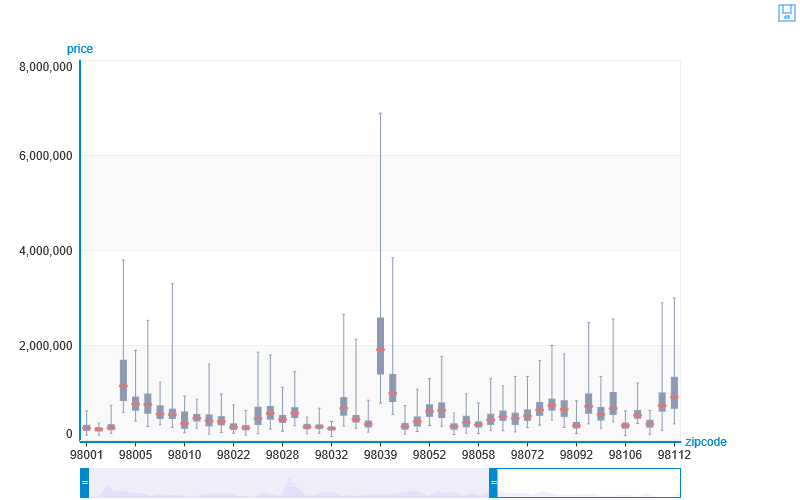

In [26]:
from IPython.display import Image, display

listOfImageNames = ['C://Users//sri//Desktop//Housing//zipcode.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [27]:
House2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,...,zipcode#98146,zipcode#98148,zipcode#98155,zipcode#98166,zipcode#98168,zipcode#98177,zipcode#98178,zipcode#98188,zipcode#98198,zipcode#98199
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,0,2170,400,...,0,0,0,0,0,0,0,0,0,0
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,0,1715,0,...,0,0,0,0,0,0,0,0,0,0
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,0,1890,0,...,0,0,0,0,0,0,0,0,0,0
12,114101516,20140528T000000,310000.0,3,1.00,1430,19901,0,1430,0,...,0,0,0,0,0,0,0,0,0,0
14,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,0,1810,0,...,0,0,0,0,0,0,0,0,0,0
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,0,1980,970,...,0,0,0,0,0,0,0,0,0,0
16,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,0,1890,0,...,0,0,0,0,0,0,0,0,0,0
17,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,0,1600,0,...,0,0,0,0,0,0,0,0,0,0
22,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,0,2270,0,...,0,0,0,0,0,0,0,0,0,0
24,3814700200,20141120T000000,329000.0,3,2.25,2450,6500,0,2450,0,...,0,0,0,0,0,0,0,0,0,0


## 8. Model Fitting and Validation:

#### NOTE: We are importing user defined function to split test and train data sets.

In [32]:
import TrainTest_split as a
Train = a.Split_Train_Test(House2,.7,1)['Train']
Test = a.Split_Train_Test(House2,.7,1)['Test']
Train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,...,zipcode#98146,zipcode#98148,zipcode#98155,zipcode#98166,zipcode#98168,zipcode#98177,zipcode#98178,zipcode#98188,zipcode#98198,zipcode#98199
3740,2781250750,20140828T000000,222000.0,2,2.00,1360,3300,0,1360,0,...,0,0,0,0,0,0,0,0,0,0
3172,4024101545,20140922T000000,364000.0,4,2.25,1750,10270,0,1750,0,...,0,0,1,0,0,0,0,0,0,0
15095,2141500020,20141217T000000,500000.0,4,2.50,2230,8560,0,2230,0,...,0,0,0,0,0,0,0,0,0,0
16653,2895550190,20140808T000000,245000.0,4,2.50,1700,4268,0,1700,0,...,0,0,0,0,0,0,0,0,0,0
2328,2320069083,20141125T000000,283000.0,3,2.00,1820,15068,0,1520,300,...,0,0,0,0,0,0,0,0,0,0


In [33]:
Test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,...,zipcode#98146,zipcode#98148,zipcode#98155,zipcode#98166,zipcode#98168,zipcode#98177,zipcode#98178,zipcode#98188,zipcode#98198,zipcode#98199
6100,7128300500,20141230T000000,495000.0,3,2.25,2100,3000,0,2100,0,...,0,0,0,0,0,0,0,0,0,0
5161,7856620050,20150225T000000,822000.0,3,2.00,2410,13300,0,1840,570,...,0,0,0,0,0,0,0,0,0,0
2142,98020140,20140708T000000,765000.0,4,4.00,3010,7221,0,3010,0,...,0,0,0,0,0,0,0,0,0,0
763,8856940060,20150227T000000,374950.0,4,2.75,2730,4683,0,2730,0,...,0,0,0,0,0,0,0,0,0,0
20910,53500450,20150309T000000,311850.0,4,2.50,1890,4158,0,1890,0,...,0,0,0,0,0,0,0,0,0,0


#### 1) Let us try to fit the models with sqft_above,sqft_basement to predict price

In [34]:
X_Train = stm.add_constant(Train[['sqft_above','sqft_basement']])
Y_Train = Train.iloc(Train.price)
Y_Train = Train.price

X_Test = stm.add_constant(Test[['sqft_above','sqft_basement']])
Y_Test = Test.iloc(Test.price)
Y_Test = Test.price

In [35]:
#Some checks...
print(len(Train), len(Train))
print(len(Test), len(X_Test))

7646 7646
3278 3278


In [36]:
model = stm.OLS(Y_Train,X_Train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     3701.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        02:58:21   Log-Likelihood:            -1.0715e+05
No. Observations:                7646   AIC:                         2.143e+05
Df Residuals:                    7643   BIC:                         2.143e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.857e+04   9387.941     -5.174      0.000    -6.7e+04   -3.02e+04
sqft_above      270.4679      3.926     68.890      0.000     262.772     278.164
sqft_basement   434.2596      9.163     47.391      0.000     416.297     452.222
==============================================================================
Omnibus:                     4770.403   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130992.754
Skew:                           2.527   Prob(JB):                         0.00
Kurtosis:                      22.637   Cond. No.                     6.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
pred = model.predict(X_Test)

In [38]:
sum((Y_Test - pred)**2)

316732472446910.38


#### 2) Let us try to include grade as well into the model as it has correlation with price. The models have sqft_above,sqft_basement,grade to predict price


In [56]:
X_Train1 = stm.add_constant(Train[['sqft_above','sqft_basement','grade#12']])
Y_Train1 = Train.iloc(Train.price)
Y_Train1 = Train.price

X_Test1 = stm.add_constant(Test[['sqft_above','sqft_basement','grade#12']])
Y_Test1 = Train.iloc(Train.price)
Y_Test1 = Test.price



In [57]:
model = stm.OLS(Y_Train1,X_Train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     2646.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        03:00:19   Log-Likelihood:            -1.0702e+05
No. Observations:                7646   AIC:                         2.140e+05
Df Residuals:                    7642   BIC:                         2.141e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.967e+04   9389.644     -2.095      0.036   -3.81e+04   -1267.190
sqft_above      256.5557      3.949     64.969      0.000     248.815     264.297
sqft_basement   421.3077      9.039     46.612      0.000     403.590     439.026
grade#12       7.449e+05   4.51e+04     16.521      0.000    6.57e+05    8.33e+05
==============================================================================
Omnibus:                     4709.783   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137835.911
Skew:                           2.458   Prob(JB):                         0.00
Kurtosis:                      23.211   Cond. No.                     3.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
pred = model.predict(X_Test1)

In [59]:
sum((Y_Test1 - pred)**2)

303482408390599.19

#### 3) Let us try to include bathrooms,bedrooms as well into the model as it has correlation with price. The models have sqft_above,sqft_basement,grade,bathrooms to predict price

In [60]:
Train  = Train.loc[Train.bathrooms !=0, ]
Train  = Train.loc[Train.bedrooms !=0, ]

In [61]:
Train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,zipcode#98146,zipcode#98148,zipcode#98155,zipcode#98166,zipcode#98168,zipcode#98177,zipcode#98178,zipcode#98188,zipcode#98198,zipcode#98199
count,7.646000e+03,7.646000e+03,7646.000000,7646.000000,7646.000000,7.646000e+03,7646.000000,7646.000000,7646.000000,7646.000000,...,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000
mean,4.648874e+09,6.299653e+05,3.565655,2.456023,2398.140466,1.561069e+04,0.009547,2215.471096,182.669370,1981.229009,...,0.007193,0.001046,0.010855,0.007193,0.006147,0.005755,0.005624,0.003662,0.007324,0.013210
std,2.904839e+09,4.139878e+05,0.875698,0.719033,956.651131,4.298812e+04,0.097250,861.159842,368.971394,32.666770,...,0.084513,0.032332,0.103629,0.084513,0.078167,0.075646,0.074786,0.060408,0.085273,0.114179
min,1.000102e+06,9.000000e+04,1.000000,0.500000,490.000000,6.000000e+02,0.000000,490.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.143701e+09,3.750000e+05,3.000000,2.250000,1680.000000,4.080000e+03,0.000000,1570.000000,0.000000,1967.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.905081e+09,5.350000e+05,4.000000,2.500000,2247.500000,6.360000e+03,0.000000,2090.000000,0.000000,1994.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.498503e+09,7.500000e+05,4.000000,2.750000,2930.000000,1.004375e+04,0.000000,2720.000000,160.000000,2005.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.895000e+09,7.060000e+06,10.000000,7.750000,10040.000000,1.074218e+06,1.000000,8860.000000,3000.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
X_Train2 = stm.add_constant(Train[['sqft_above','sqft_basement','grade#12','bathrooms','bedrooms']])
Y_Train2 = Train.iloc(Train.price)
Y_Train2 = Train.price

X_Test2 = stm.add_constant(Test[['sqft_above','sqft_basement','grade#12','bathrooms','bedrooms']])
Y_Test2 = Train.iloc(Train.price)
Y_Test2 = Test.price

In [63]:
model = stm.OLS(Y_Train2,X_Train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1643.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        03:01:09   Log-Likelihood:            -1.0695e+05
No. Observations:                7646   AIC:                         2.139e+05
Df Residuals:                    7640   BIC:                         2.139e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.515e+04   1.57e+04      6.061      0.000    6.44e+04    1.26e+05
sqft_above      280.7011      5.391     52.070      0.000     270.133     291.269
sqft_basement   442.4811      9.833     45.001      0.000     423.206     461.756
grade#12       7.056e+05   4.48e+04     15.739      0.000    6.18e+05    7.93e+05
bathrooms      6576.5774   6233.090      1.055      0.291   -5641.991    1.88e+04
bedrooms      -5.276e+04   4498.800    -11.727      0.000   -6.16e+04   -4.39e+04
==============================================================================
Omnibus:                     4606.580   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126309.348
Skew:                           2.401   Prob(JB):                         0.00
Kurtosis:                      22.324   Cond. No.                     3.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
pred = model.predict(X_Test2)
sum((Y_Test2 - pred)**2)

300446542725185.13

#### 4) Let us try to include sqft_lot,floors and zipcode as well into the model as it has correlation with price. The models have sqft_above,sqft_basement,grade,bathrooms,sqft_lot,floors to predict price 


In [71]:
X_Train6 = stm.add_constant(Train[['sqft_above','sqft_basement','bedrooms','bathrooms','grade#11','sqft_lot']])
Y_Train6 = Train.iloc(Train.price)
Y_Train6 = Train.price

X_Test6 = stm.add_constant(Test[['sqft_above','sqft_basement','bedrooms','bathrooms','grade#11','sqft_lot']])
Y_Test6 = Train.iloc(Train.price)
Y_Test6 = Test.price

In [72]:
model = stm.OLS(Y_Train6,X_Train6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     1359.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        03:02:41   Log-Likelihood:            -1.0696e+05
No. Observations:                7646   AIC:                         2.139e+05
Df Residuals:                    7639   BIC:                         2.140e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.062e+05   1.58e+04      6.717      0.000    7.52e+04    1.37e+05
sqft_above      280.1879      5.746     48.759      0.000     268.923     291.452
sqft_basement   441.8850      9.920     44.545      0.000     422.439     461.331
bedrooms       -5.42e+04   4543.700    -11.928      0.000   -6.31e+04   -4.53e+04
bathrooms      5944.2452   6255.172      0.950      0.342   -6317.610    1.82e+04
grade#11       2.682e+05   2.04e+04     13.180      0.000    2.28e+05    3.08e+05
sqft_lot         -0.4942      0.079     -6.250      0.000      -0.649      -0.339
==============================================================================
Omnibus:                     4745.860   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           133941.089
Skew:                           2.499   Prob(JB):                         0.00
Kurtosis:                      22.886   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
pred = model.predict(X_Test6)
sum((Y_Test6 - pred)**2)

299518693267083.25

In [146]:
# A function that take one input of the dataset and return the RMSE (of the test data), and the intercept and coefficient
def simple_linear_model(train, test, input_feature):
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = [input_feature]), train.as_matrix(columns = ['price'])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = ['price']), 
                              regr.predict(test.as_matrix(columns = [input_feature])))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_[0][0]

In [147]:
RMSE, w0, w1 = simple_linear_model(Train, Test, 'sqft_living')
print ('RMSE for sqft_living is: %s ' %RMSE)
print ('intercept is: %s' %w0)
print ('coefficient is: %s' %w1)

RMSE for sqft_living is: 315550.229733 
intercept is: -85121.5928695
coefficient is: 298.183899302


In [77]:
# A function that take multiple features as input and return the RMSE (of the test data), and the  intercept and coefficients
def multiple_regression_model(train, test, input_features):
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = input_features), train.as_matrix(columns = ['price'])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = ['price']), 
                              regr.predict(test.as_matrix(columns = input_features)))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_ 

In [83]:
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(Train, 
                                                                             Test, ['sqft_living','bathrooms','bedrooms']))
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(Train, 
                                                                             Test, ['sqft_above','sqft_basement','grade#12']))
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(Train, 
                                                                             Test, ['sqft_above','sqft_basement','grade#12','bathrooms','bedrooms']))
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(Train, 
                                                                             Test, ['view#0','grade#12','bedrooms','sqft_basement']))
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(Train, 
                                                                             Test, ['sqft_living','bathrooms','view#0']))

RMSE: 313003.266547, intercept: 38632.8767472, coefficients: [[   320.52262222  14599.66259151 -59787.88018912]]
RMSE: 304272.208212, intercept: -19673.468908, coefficients: [[  2.56555739e+02   4.21307733e+02   7.44947720e+05]]
RMSE: 302746.499855, intercept: 95147.3700133, coefficients: [[  2.80701053e+02   4.42481119e+02   7.05555357e+05   6.57657736e+03
   -5.27553381e+04]]
RMSE: 352779.622899, intercept: 557536.496082, coefficients: [[ -3.51570244e+05   1.23017498e+06   9.09860314e+04   3.09257755e+02]]
RMSE: 304578.303592, intercept: 214967.595034, coefficients: [[  2.69843879e+02   8.42590182e+03  -2.81664296e+05]]


### We can also try to fit a higher-order polynomial on the input. For example, we can try to fit a qudratic function on sqft_living

In [88]:
Train['sqft_living_squared'] = Train['sqft_living'].apply(lambda x: x**2) # create a new column in train_data
Test['sqft_living_squared'] = Test['sqft_living'].apply(lambda x: x**2) # create a new column in test_data
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(Train, 
                                                                             Test, ['sqft_living','sqft_living_squared']))

RMSE: 323673.131451, intercept: 338088.892532, coefficients: [[-29.75942511   0.05449086]]


In [91]:
# we're first going to add more features into the dataset.

# sqft_living cubed
Train['sqft_living_cubed'] = Train['sqft_living'].apply(lambda x: x**3) 
Test['sqft_living_cubed'] = Test['sqft_living'].apply(lambda x: x**3) 

# bedrooms_squared: this feature will mostly affect houses with many bedrooms.
Train['bedrooms_squared'] = Train['bedrooms'].apply(lambda x: x**2) 
Test['bedrooms_squared'] = Test['bedrooms'].apply(lambda x: x**2)

# bedrooms times bathrooms gives what's called an "interaction" feature. It is large when both of them are large.
Train['bed_bath_rooms'] = Train['bedrooms']*Train['bathrooms']
Test['bed_bath_rooms'] = Test['bedrooms']*Test['bathrooms']

# Taking the log of squarefeet has the effect of bringing large values closer together and spreading out small values.
Train['log_sqft_living'] = Train['sqft_living'].apply(lambda x: log(x))
Test['log_sqft_living'] = Test['sqft_living'].apply(lambda x: log(x))

Train.shape

(7646, 118)

In [93]:
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(Train, 
                                                                             Test, ['sqft_living_cubed','bedrooms_squared','bed_bath_rooms','log_sqft_living']))

RMSE: 379308.233902, intercept: -1750394.72824, coefficients: [[  5.74500281e-06  -5.46706466e+03   4.73725341e+03   2.96798175e+05]]


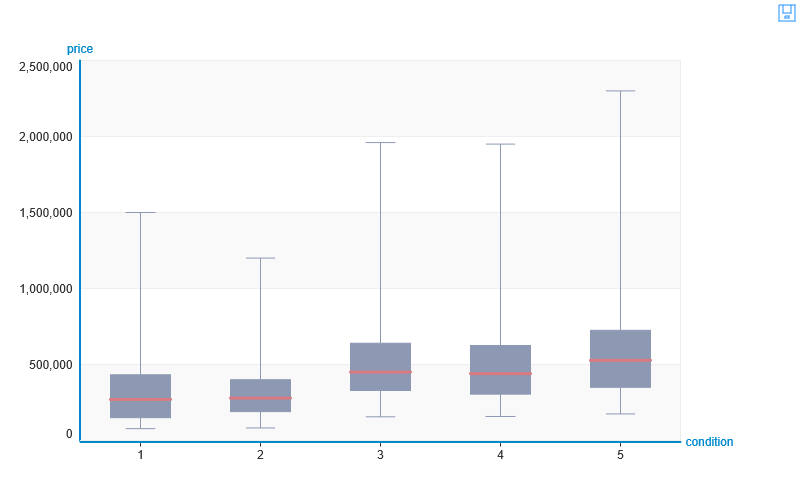

In [103]:
from IPython.display import Image, display

listOfImageNames = ['C://Users//sri//Desktop//Housing//cond.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

#### Consider condition5 to analyse the fit based on the box plot diagram

In [118]:
X_Train7 = stm.add_constant(Train[['sqft_above','sqft_basement','sqft_living','bedrooms','bathrooms','grade#11','waterfront','condition#5','sqft_lot','sqft_living15','sqft_lot15','zipcode#98039','view#0','yr_built','yr_renovated']])
Y_Train7 = Train.iloc(Train.price)
Y_Train7 = Train.price

## average sq.ft. of 15 nearest neighbors is sqft_living15

X_Test7 = stm.add_constant(Test[['sqft_above','sqft_basement','sqft_living','bedrooms','bathrooms','grade#11','waterfront','condition#5','sqft_lot','sqft_living15','sqft_lot15','zipcode#98039','view#0','yr_built','yr_renovated']])
Y_Test7 = Train.iloc(Train.price)
Y_Test7 = Test.price

In [119]:
model = stm.OLS(Y_Train7,X_Train7).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     926.3
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        03:41:52   Log-Likelihood:            -1.0594e+05
No. Observations:                7646   AIC:                         2.119e+05
Df Residuals:                    7631   BIC:                         2.120e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.401e+06   2.41e+05     22.442      0.000    4.93e+06    5.87e+06
sqft_above       62.5852      4.591     13.631      0.000      53.585      71.585
sqft_basement   115.7441      6.138     18.857      0.000     103.712     127.776
sqft_living     178.3292      4.456     40.020      0.000     169.594     187.064
bedrooms      -6.332e+04   4155.754    -15.236      0.000   -7.15e+04   -5.52e+04
bathrooms      7.804e+04   6397.371     12.199      0.000    6.55e+04    9.06e+04
grade#11       1.947e+05   1.79e+04     10.859      0.000     1.6e+05     2.3e+05
waterfront     7.058e+05   3.12e+04     22.601      0.000    6.45e+05    7.67e+05
condition#5     4.54e+04   1.37e+04      3.309      0.001    1.85e+04    7.23e+04
sqft_lot         -0.1414      0.102     -1.383      0.167      -0.342       0.059
sqft_living15    34.8449      6.262      5.564      0.000      22.569      47.121
sqft_lot15       -0.6777      0.151     -4.492      0.000      -0.973      -0.382
zipcode#98039  1.238e+06   5.57e+04     22.204      0.000    1.13e+06    1.35e+06
view#0        -1.286e+05   1.07e+04    -11.997      0.000    -1.5e+05   -1.08e+05
yr_built      -2671.6979    123.747    -21.590      0.000   -2914.276   -2429.120
yr_renovated      4.8748      7.452      0.654      0.513      -9.733      19.483
==============================================================================
Omnibus:                     3562.011   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65247.631
Skew:                           1.780   Prob(JB):                         0.00
Kurtosis:                      16.861   Cond. No.                     9.36e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.47e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'zipcode#98039',
'condition#5', # condition of house
'grade#11', # measure of quality of construction
'waterfront', # waterfront property
'view#0', # type of view 0 based on data exploration
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'sqft_living15', # average sq.ft. of 15 nearest neighbors 
'sqft_lot15'

## Conclusion

### We encoded all the categorical variables and considered all the above features to get the best fit of R-squared value 0.630

In [143]:
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(Train, 
                                                                             Test,['sqft_above','sqft_basement','sqft_living','bedrooms','bathrooms','grade#11','waterfront','condition#5','sqft_lot','sqft_living15','sqft_lot15','zipcode#98039','view#0','yr_built','yr_renovated']))


RMSE: 267934.40575, intercept: 5400994.65664, coefficients: [[  6.25851762e+01   1.15744067e+02   1.78329244e+02  -6.33152534e+04
    7.80421973e+04   1.94725671e+05   7.05752591e+05   4.53965175e+04
   -1.41441871e-01   3.48448970e+01  -6.77745813e-01   1.23772696e+06
   -1.28616797e+05  -2.67169787e+03   4.87481233e+00]]


#### RMSE has been reduced to 267934.40575